In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are readable
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="whitegrid")

In [9]:
pivot_df_cleaned_file = "pivot_df_cleaned.csv"
pivot_df_cleaned = pd.read_csv(pivot_df_cleaned_file)


pivot_df_temp0_cleaned_file = "pivot_df_temp0_cleaned.csv"
pivot_df_temp0_cleaned = pd.read_csv(pivot_df_temp0_cleaned_file)


pivot_df_uncleaned_file = "pivot_df.csv"
pivot_df_uncleaned = pd.read_csv(pivot_df_uncleaned_file)


pivot_df_temp0_uncleaned_file = "pivot_df_temp0.csv"
pivot_df_temp0_uncleaned = pd.read_csv(pivot_df_temp0_uncleaned_file)

In [10]:
df_list = {
   "pivot_df_cleaned": pivot_df_cleaned,
   "pivot_df_temp0_cleaned": pivot_df_temp0_cleaned,
   "pivot_df_uncleaned": pivot_df_uncleaned,
   "pivot_df_temp0_uncleaned": pivot_df_temp0_uncleaned,
}


duration_cols = ['duration_diff_cache_uncache', 'duration_diff_cache_sharegpt', 'duration_diff_uncache_sharegpt']

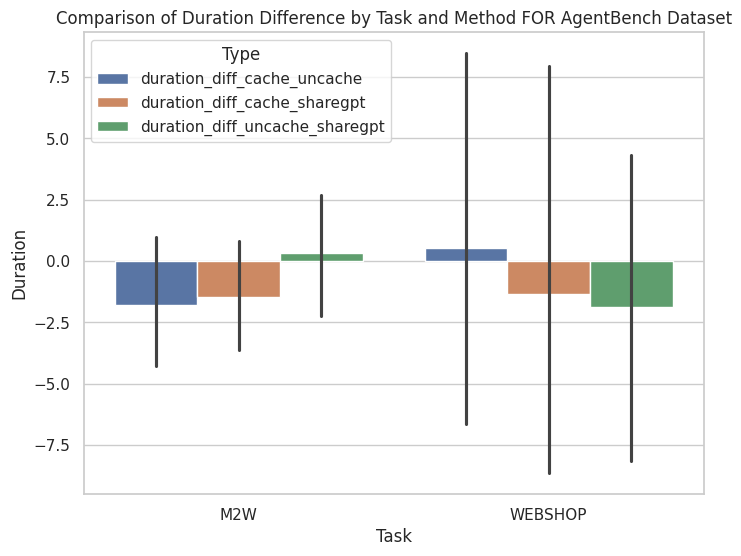

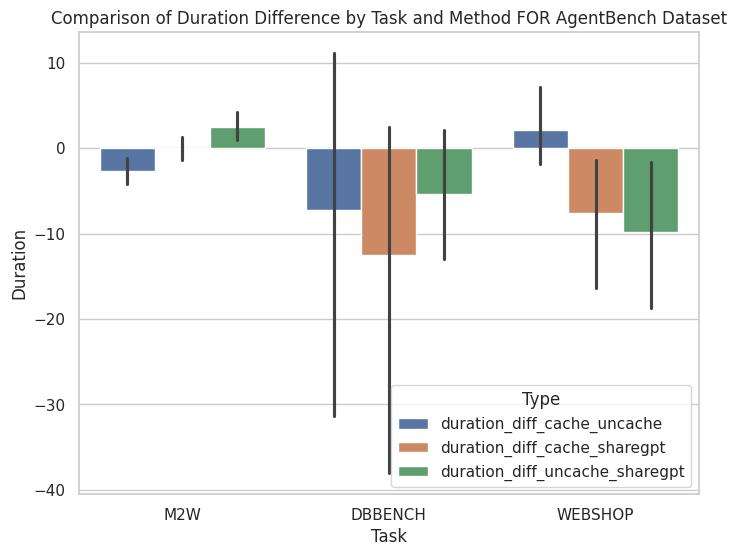

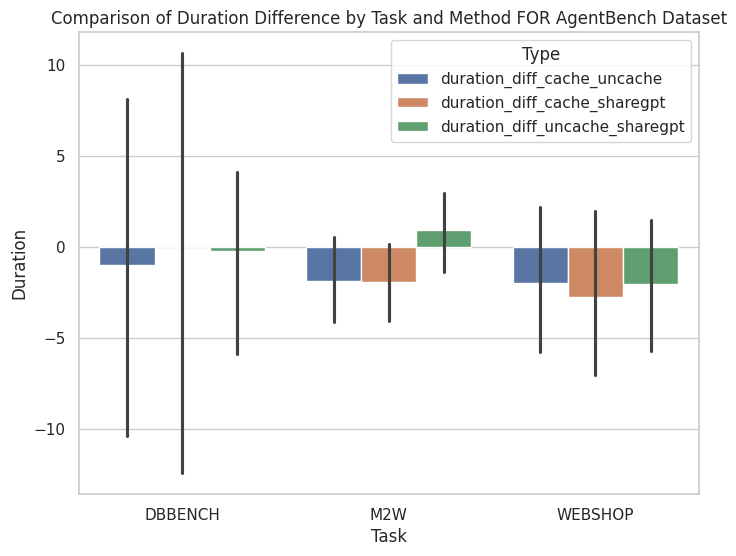

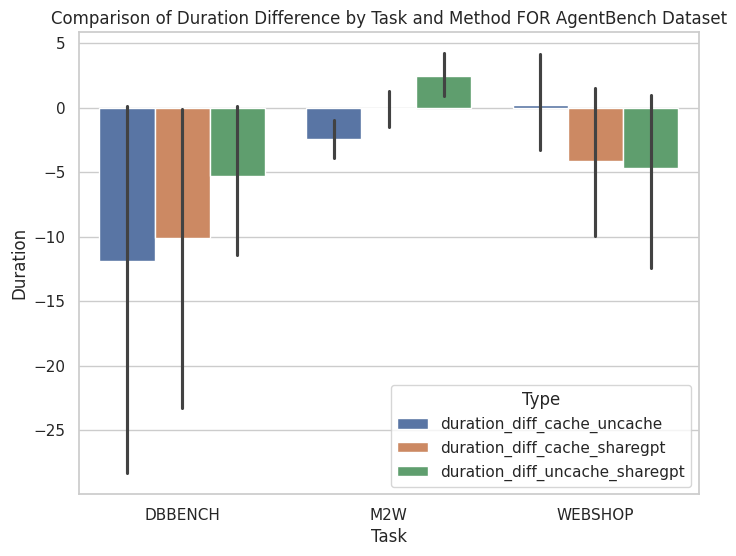

In [17]:
for key, df in df_list.items():
    df.rename(columns={'task': 'Task'}, inplace=True)
    df_melted = df.melt(id_vars=['index', 'Task'], value_vars=duration_cols, var_name='Type', value_name='Duration')

    sns.barplot(data=df_melted, x='Task', y='Duration', hue='Type')
    # plt.title(f"Comparison of Duration Difference by Task and Method FOR {key}")
    plt.title(f"Comparison of Duration Difference by Task and Method FOR AgentBench Dataset")
    plt.show()

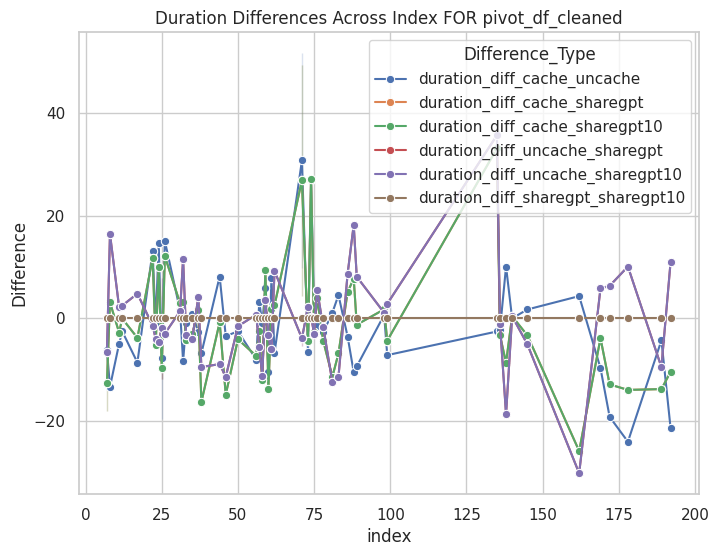

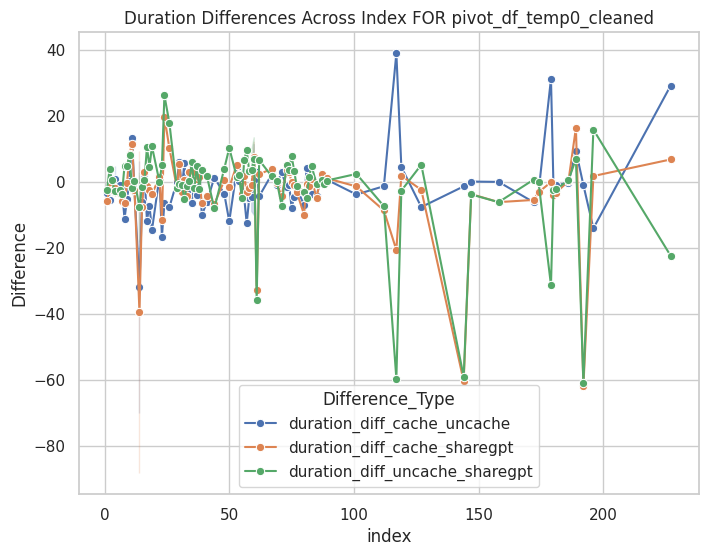

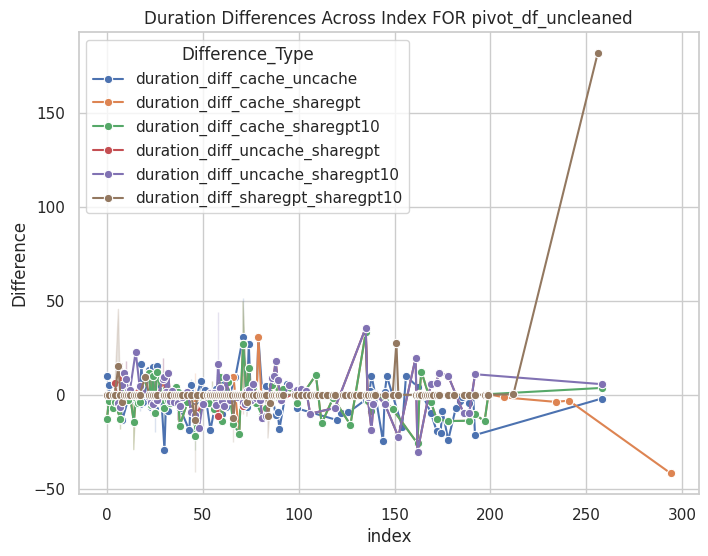

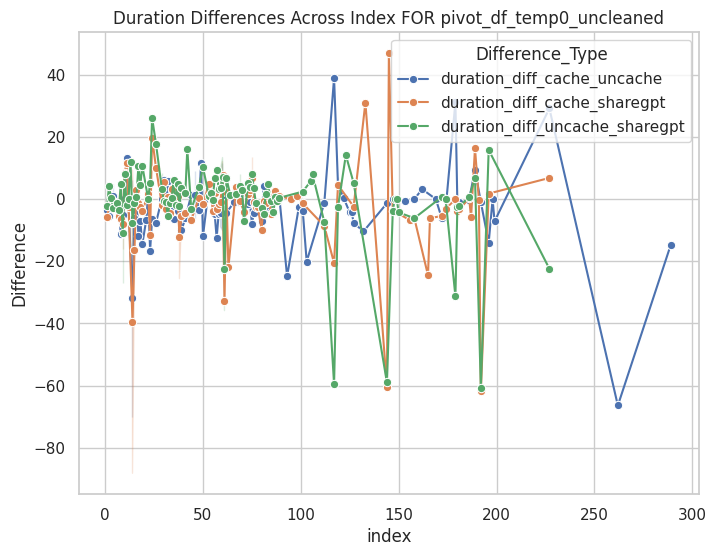

In [18]:
for key, df in df_list.items():
    diff_cols = [col for col in df.columns if col.startswith('duration_diff')]
    df_diff = df[['index'] + diff_cols].drop_duplicates()
    df_melted_diff = df_diff.melt(id_vars='index', var_name='Difference_Type', value_name='Difference')

    sns.lineplot(data=df_melted_diff, x='index', y='Difference', hue='Difference_Type', marker='o')
    plt.title(f"Duration Differences Across Index FOR {key}")
    plt.show()

In [19]:
plt.rcParams['figure.figsize'] = (24, 18)

In [20]:
# for key, df in df_list.items():
#     heatmap_data = df.set_index(['index', 'task'])[diff_cols]
#     sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
#     plt.title(f"Heatmap of Duration Differences FOR {key}")
#     plt.show()

In [21]:
# plt.rcParams['figure.figsize'] = (18, 18)
# for key, df in df_list.items():
#     # Ensure Total_Duration is available
#     df['Total_Duration'] = df[duration_cols].sum(axis=1)

#     # Loop over each unique task
#     for task_name in df['task'].unique():
#         df_task = df[df['task'] == task_name]
#         df_stacked = df_task[['index', 'task'] + duration_cols].set_index(['index', 'task'])

#         df_stacked.plot(kind='bar', stacked=True)
#         plt.title(f"Stacked Bar Chart of Durations for Task '{task_name}' | Dataset: {key}")
#         plt.ylabel("Duration Difference")
#         plt.xlabel("Index, Task")
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.show()


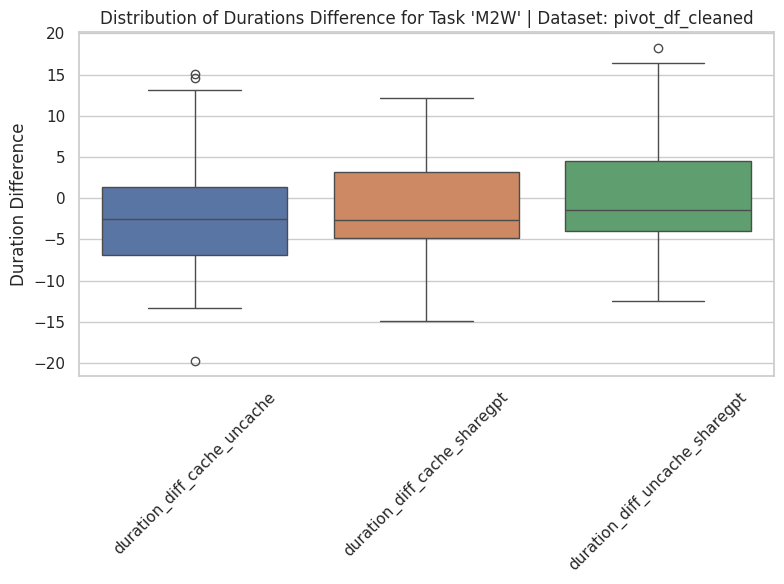

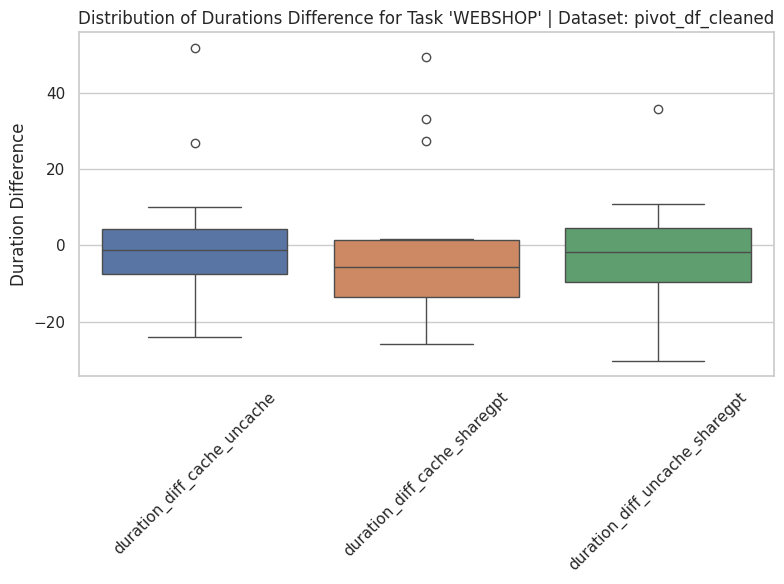

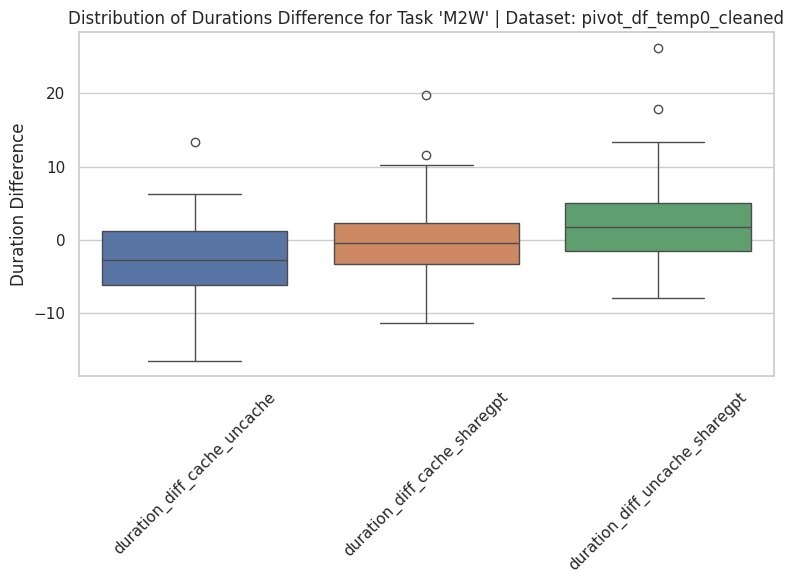

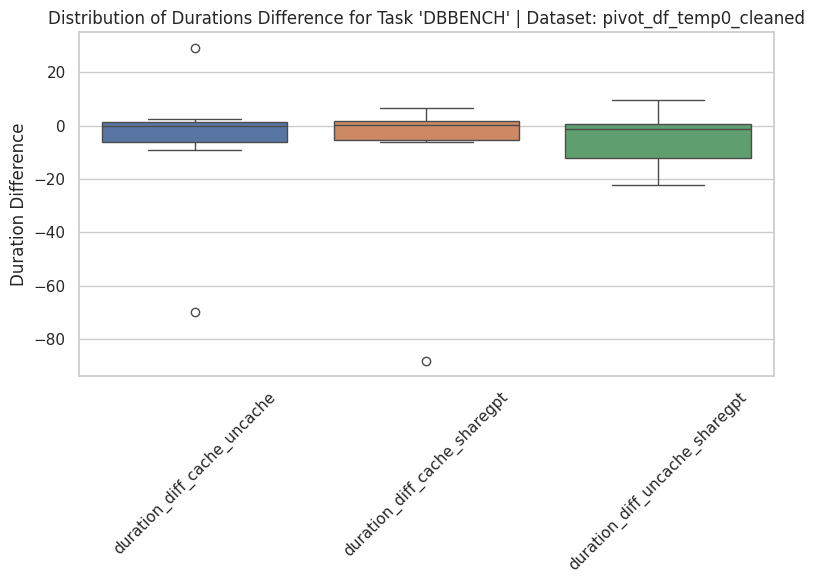

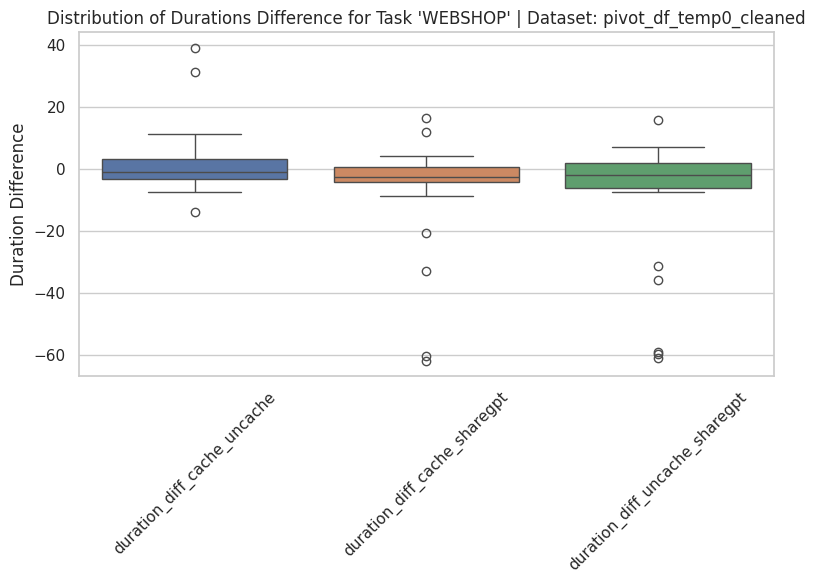

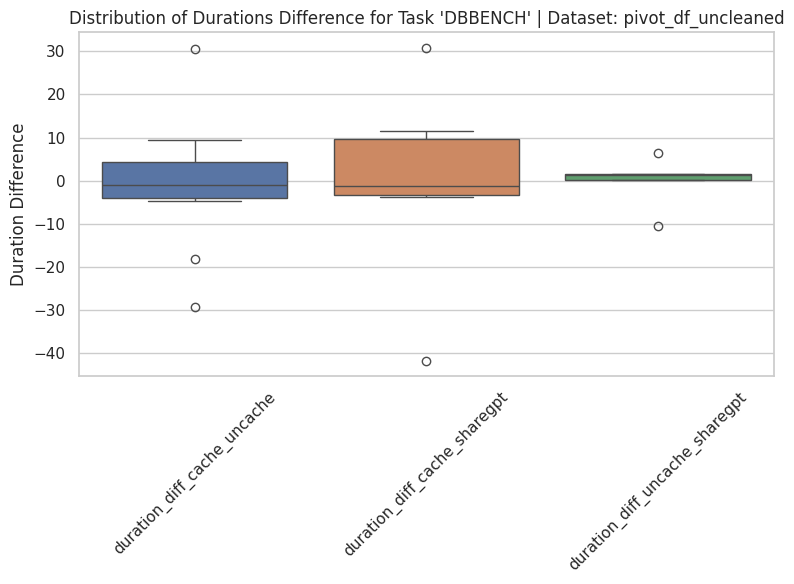

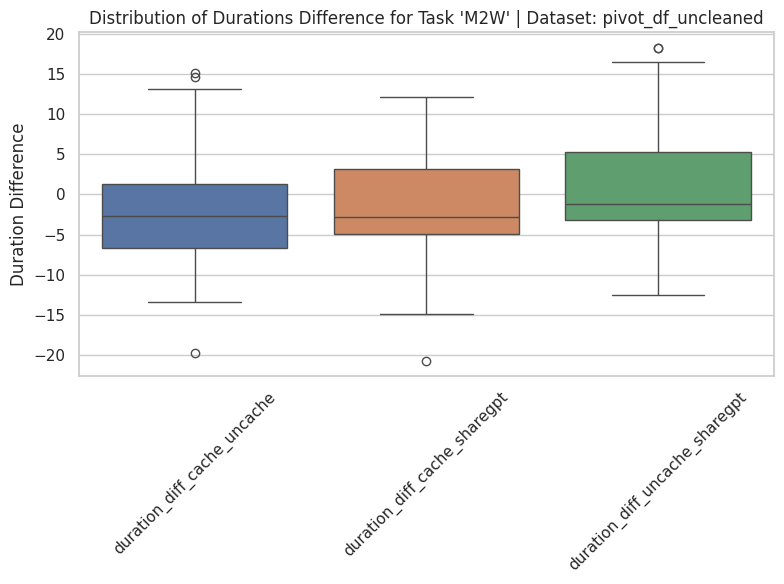

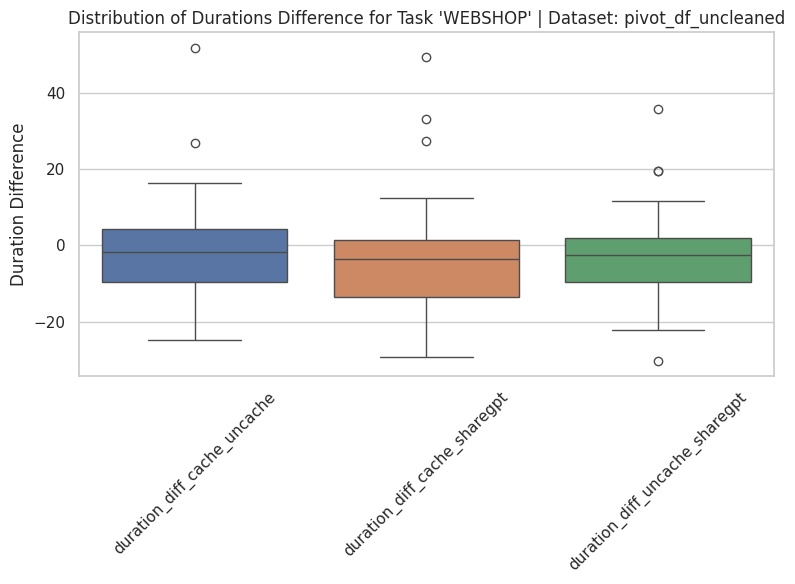

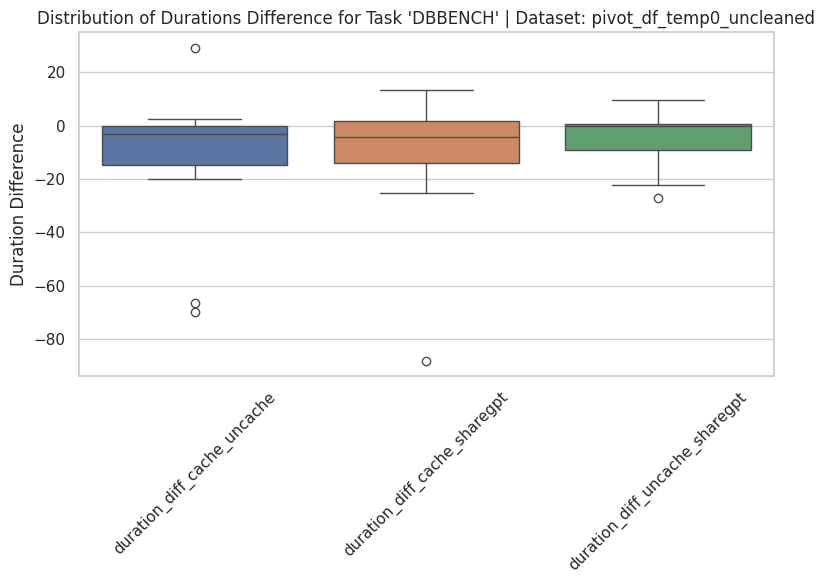

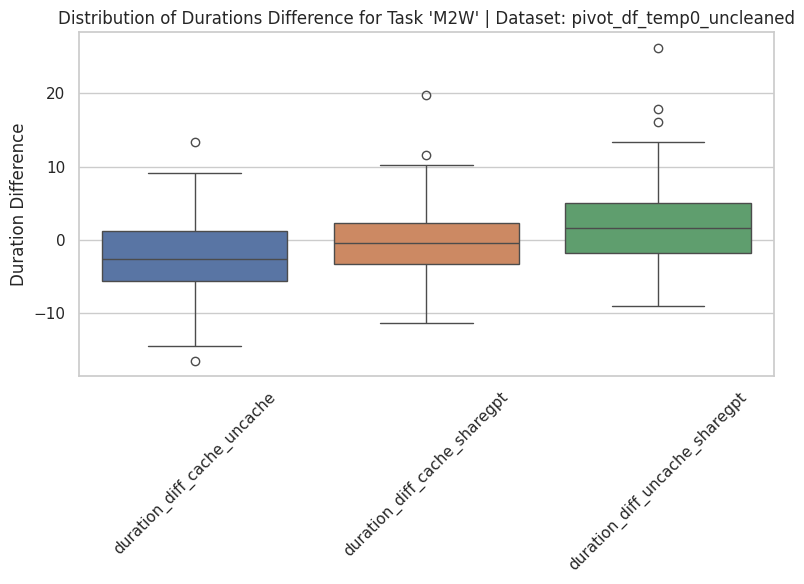

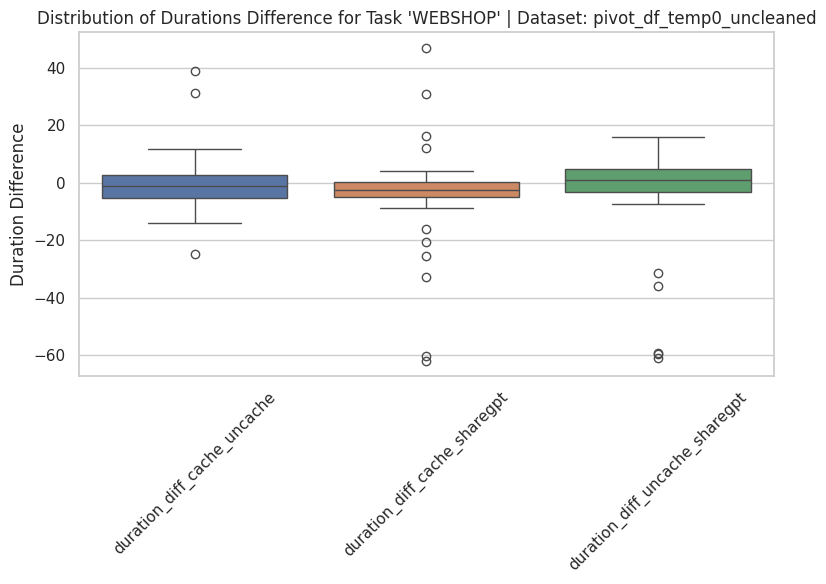

In [22]:
plt.rcParams['figure.figsize'] = (8, 6)
for key, df in df_list.items():
    for task_name in df['Task'].unique():
        df_task = df[df['Task'] == task_name]
        
        sns.boxplot(data=df_task[duration_cols])
        plt.title(f"Distribution of Durations Difference for Task '{task_name}' | Dataset: {key}")
        plt.ylabel("Duration Difference")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
